In [1]:
gui qt5

In [2]:
import napari
import skimage
import sys
import os
import cv2
from napari_ome_zarr import napari_get_reader
import PIL
from PIL import Image
import tifffile
import numpy as np
from PIL import TiffImagePlugin
import zarr as z
import tifffile as tiff

In [3]:
import apoc
import os
from skimage.io import imread, imshow
import pyclesperanto_prototype as cle
import matplotlib.pyplot as plt
from apoc import PixelClassifier

In [ ]:
napari.run()

In [ ]:
input_directory = "/mnt/md0/rajalakshmi/Kristin_Data/PE-CT1_Microfil_Perfusions-2020_07_13/2020_07_13_Hearts_wo_Aorta/1738-Heart_wo_aorta-downsampled/"

In [ ]:
sorted(os.listdir(input_directory))

In [ ]:
output = "/mnt/md0/rajalakshmi/Kristin_Data/PE-CT1_Microfil_Perfusions-2020_07_13/2020_07_13_Hearts_wo_Aorta/1738/1738_raw_Tif/"

In [ ]:
for filename in sorted(os.listdir(input_directory)):
    filepath = '/mnt/md0/rajalakshmi/Kristin_Data/PE-CT1_Microfil_Perfusions-2020_07_13/2020_07_13_Hearts_wo_Aorta/1738-Heart_wo_aorta-downsampled/' + filename
    if filename.endswith(".bmp"):
     img = Image.open(filepath).convert('RGB')
     #tiff.imwrite(file_name, img, bigtiff=True, photometric='rgb')
     img.save('/mnt/md0/rajalakshmi/Kristin_Data/PE-CT1_Microfil_Perfusions-2020_07_13/2020_07_13_Hearts_wo_Aorta/1738/1738_raw_Tif/' + filename.replace('.bmp' , '.tiff'), format='TIFF', compression='tiff_lzw')

In [7]:

bf2raw_dir = '/mnt/md0/rajalakshmi/bioformats2raw-0.5.0-rc1/'

bf2raw = os.path.join(bf2raw_dir, "bioformats2raw")

tifffile = "/mnt/md0/rajalakshmi/Kristin_Data/PE-CT1_Microfil_Perfusions-2020_07_13/2020_07_13_Hearts_wo_Aorta/1683/Hessian_Scalesresults2.tif"
    
os.chdir(bf2raw_dir)

cmd = 'bioformats2raw /mnt/md0/rajalakshmi/Kristin_Data/PE-CT1_Microfil_Perfusions-2020_07_13/2020_07_13_Hearts_wo_Aorta/1683/Hessian_Scalesresults2.tif /mnt/md0/rajalakshmi/Kristin_Data/PE-CT1_Microfil_Perfusions-2020_07_13/2020_07_13_Hearts_wo_Aorta/1683/Hessian_Scalesresults2.zarr' 

print('Command String : ', cmd)


Command String :  bioformats2raw /mnt/md0/rajalakshmi/Kristin_Data/PE-CT1_Microfil_Perfusions-2020_07_13/2020_07_13_Hearts_wo_Aorta/1683/Hessian_Scalesresults2.tif /mnt/md0/rajalakshmi/Kristin_Data/PE-CT1_Microfil_Perfusions-2020_07_13/2020_07_13_Hearts_wo_Aorta/1683/Hessian_Scalesresults2.zarr


In [8]:
os.system(cmd)

OpenJDK 64-Bit Server VM warning: You have loaded library /tmp/opencv_openpnp4531597256327399610/nu/pattern/opencv/linux/x86_64/libopencv_java342.so which might have disabled stack guard. The VM will try to fix the stack guard now.
It's highly recommended that you fix the library with 'execstack -c <libfile>', or link it with '-z noexecstack'.


0

In [ ]:
#Napari 3D visualization:

In [9]:
def napari_view():
    path = '/mnt/md0/rajalakshmi/Kristin_Data/PE-CT1_Microfil_Perfusions-2020_07_13/2020_07_13_Hearts_wo_Aorta/1683/Hessian_Scalesresults2.zarr/0'
    
    viewer = napari.Viewer()
    viewer.open('/mnt/md0/rajalakshmi/Kristin_Data/PE-CT1_Microfil_Perfusions-2020_07_13/2020_07_13_Hearts_wo_Aorta/1683/Hessian_Scalesresults2.zarr/0')
    napari.run()
    
napari_view()

/home/rajalakshmi/anaconda3/envs/napari-env/lib/python3.9/site-packages/napari_tools_menu/__init__.py:168: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)
version mismatch: detected:FormatV02, requested:FormatV04
version mismatch: detected:FormatV04, requested:FormatV02
/home/rajalakshmi/anaconda3/envs/napari-env/lib/python3.9/site-packages/napari/layers/image/image.py:617: UserWarning: Multiscale rendering is only supported in 2D. In 3D, only the lowest resolution scale is displayed
  warnings.warn(


In [ ]:

def tiffs2zarr(filenames, zarrurl, chunksize, **kwargs):
    """Write images from sequence of TIFF files as zarr."""

    def imread(filename):
        # return first image in TIFF file as numpy array
        with open(filename, 'rb') as fh:
            data = fh.read()
        return imagecodecs.tiff_decode(data)

    with tifffile.FileSequence(imread, filenames) as tifs:
        with tifs.aszarr() as store:
            da = dask.array.from_zarr(store)
            chunks = (chunksize,) + da.shape[1:]
            da.rechunk(chunks).to_zarr(zarrurl, **kwargs)


from glob import glob

tiffs2zarr(glob('/mnt/md0/rajalakshmi/Kristin_Data/PE-CT1_Microfil_Perfusions-2020_07_13/2020_07_13_Hearts_wo_Aorta/1683/1683_raw_Tif_red/'), 'temp', 1000)

In [ ]:
print('PIL',PIL.__version__)

In [ ]:
viewer = napari.Viewer()

In [ ]:
viewer.open('/home/rajalakshmi/Segmentation/mv_heart/trainned_classifier/trainning_slices_red0000.tif')

In [ ]:
print(apoc.__version__)

In [ ]:
# Napari GUI training pixel classifier

In [ ]:
def napari_view():
    path = '/home/rajalakshmi/Segmentation/mv_heart/trainned_classifier/trainning_slices_red0000.tif'
    
    viewer = napari.Viewer()
    
    viewer.open('/home/rajalakshmi/Segmentation/mv_heart/trainned_classifier/trainning_slices_red0000.tif')
   
    
    napari.run()
    
napari_view()

In [ ]:
def napari_view():
    path = '/home/rajalakshmi/Segmentation/mv_heart/2020_01_21_Rat_4_Heart_rec_gbfg_segmented_merged.zarr/0'
    
    viewer = napari.Viewer()
    
    viewer.open('/home/rajalakshmi/Segmentation/mv_heart/2020_01_21_Rat_4_Heart_rec_gbfg_segmented_merged.zarr/0', channel_axis = 1)
    
    napari.run()
    
napari_view()

In [ ]:
# Napari implying trianned classifier on test images

In [ ]:
from apoc import PixelClassifier
from skimage.io import imshow, imread

#test image
image0 = imread('/home/rajalakshmi/Segmentation/mv_heart/2020_01_21_Rat_4_Heart_Rec_tiff_merged_red.tif')

#trainned classifier model
segmenter = PixelClassifier(opencl_filename='/home/rajalakshmi/Segmentation/mv_heart/trainned_classifier/PixelClassifier2.cl')

#imply model on test data
result = PixelClassifier(opencl_filename='/home/rajalakshmi/Segmentation/mv_heart/trainned_classifier/PixelClassifier2.cl').predict(image=image0)

tifffile.imsave('/mnt/md0/rajalakshmi/napari_results/results.tif', result)

In [ ]:
# Napari implying trianned classifier on a folder of test images (for loop for batch processing)

In [ ]:
#segmenter = PixelClassifier(opencl_filename='/home/rajalakshmi/Segmentation/mv_heart/trainned_classifier/PixelClassifier2.cl')

input_dir = '/mnt/md0/rajalakshmi/napari_results/Napari_training_folder/test_data/2020_01_21_Rat_4_Heart_Rec_tiff_red/'

infiles = os.listdir(input_dir)

for filename in infiles:
    filepath = imread('/mnt/md0/rajalakshmi/napari_results/Napari_training_folder/test_data/2020_01_21_Rat_4_Heart_Rec_tiff_red/' + filename)
    if filename[-4:] != '.tif':
        print ("skipping %s".format(infile))
        continue
        
    result = PixelClassifier(opencl_filename='/mnt/md0/rajalakshmi/bioformats2raw-0.2.0/PixelClassifier.cl').predict(image = filepath)
    
    tifffile.imsave('/mnt/md0/rajalakshmi/napari_results/Napari_training_folder/test_data/output2/' + filename, result)   

In [ ]:
#Ilastik Segmentation and batch processing using headless mode (Trainned the classifier using Ilastik software):

In [ ]:
#segmentation with Ilastik - install ilastik and move it to segmentation folder

ilastik_dir = '/home/rajalakshmi/Segmentation/ilastik-1.4.0b27post1-gpu-Linux'

#Trian the random forest classifier with few slices (as individual images) from the whole stack
#save the project as specific classifier model

ilastik_project = '/mnt/md0/rajalakshmi/ilastik_results/training_data/TrainnedClassifier.ilp'

#path for test files

input_dir = '/mnt/md0/rajalakshmi/Kristin_Data/PE-CT1_Microfil_Perfusions-2020_07_13/2020_07_13_Hearts_wo_Aorta/1683/1683_raw_Tif_red/'

#make test files as input files for batch processing

infiles =os.listdir(input_dir)

In [ ]:
print (infiles)

In [ ]:
os.chdir(ilastik_dir)
for infile in infiles:
    
    if infile[-4:] != '.tif':
        print ("skipping %s".format(infile))
        continue

    
    # probabilities, simple segmentation, uncertainity, labels
    
    export_source_type = "simple segmentation"
    

    
    #refer ilastik headless mode documentation for building the command
    
    command = './run_ilastik.sh --headless --project="%s" --export_source="%s" --output_format="tif" --output_filename_format="/mnt/md0/rajalakshmi/Kristin_Data/PE-CT1_Microfil_Perfusions-2020_07_13/2020_07_13_Hearts_wo_Aorta/1683/ilastik_output/{nickname}_results.tif" --raw_data="%s%s"' %(
        ilastik_project,
        export_source_type,
        input_dir,
        infile)
    
    
    #run the command
    
    os.system(command) 

   
    



In [ ]:
 command = './run_ilastik.sh --headless \
    --project=/home/rajalakshmi/Segmentation/mv_heart/trainned_classifier/classifier_ilastik.ilp \
    --export_source=probabilities \
    --output_format=tif \
    --output_filename_format=/home/rajalakshmi/Segmentation/mv_heart/trainned_classifier/ilastik_output/{nickname}_results.tif \
   '
    


In [ ]:
#Napari - training multiple images without GUI (python interface)
#refer: https://haesleinhuepf.github.io/BioImageAnalysisNotebooks/20a_pixel_classification/apoc_train_on_folders.html

In [ ]:
import sys

In [ ]:
print(sys.getrecursionlimit())

In [ ]:
sys.setrecursionlimit(3000)

In [12]:
def napari_view():
    path = '/mnt/md0/rajalakshmi/Kristin_Data/PE-CT1_Microfil_Perfusions-2020_07_13/2020_07_13_Hearts_wo_Aorta/1683/training data/1683_raw_merged_red1027.tif'
    
    viewer = napari.Viewer()
    
    viewer.open('/mnt/md0/rajalakshmi/Kristin_Data/PE-CT1_Microfil_Perfusions-2020_07_13/2020_07_13_Hearts_wo_Aorta/1683/training data/1683_raw_merged_red1027.tif')
   
    
    napari.run()
    
napari_view()

Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.


In [ ]:
images = '/mnt/md0/rajalakshmi/napari_results/Napari_training_folder/image_folder/'
masks = '/mnt/md0/rajalakshmi/napari_results/Napari_training_folder/mask_folder/'

In [ ]:
file_list = os.listdir(images)

fig, axs = plt.subplots(1, 3, figsize=(15,15))
for i, filename in enumerate(file_list):
    image = imread(images + filename)
    cle.imshow(image, plot=axs[i])
plt.show()

file_list = os.listdir(masks)

fig, axs = plt.subplots(1, 3, figsize=(15,15))
for i, filename in enumerate(file_list):
    mask = imread(masks + filename)
    cle.imshow(mask, plot=axs[i])
plt.show()

In [ ]:
Trainning_classifier = "PixelClassifier.cl"
apoc.erase_classifier(Trainning_classifier)
segmenter = apoc.PixelClassifier(opencl_filename=Trainning_classifier, max_depth = 10, num_ensembles = 80)

# setup feature set used for training
features = apoc.PredefinedFeatureSet.object_size_1_to_5_px.value

# train classifier on folders
apoc.train_classifier_from_image_folders(
    segmenter, 
    features, 
    image = images, 
    ground_truth = masks)

In [ ]:
segmenter = apoc.PixelClassifier(opencl_filename=Trainning_classifier)

In [ ]:
input_dir = '/mnt/md0/rajalakshmi/Kristin_Data/PE-CT1_Microfil_Perfusions-2020_07_13/2020_07_13_Hearts_wo_Aorta/1683/1683_raw_Tif_red/'

infiles = os.listdir(input_dir)

for filename in infiles:
    filepath = imread('/mnt/md0/rajalakshmi/Kristin_Data/PE-CT1_Microfil_Perfusions-2020_07_13/2020_07_13_Hearts_wo_Aorta/1683/1683_raw_Tif_red/' + filename)
    if filename[-4:] != '.tif':
        print ("skipping %s".format(infile))
        continue
        
    result = PixelClassifier(opencl_filename='PixelClassifier.cl').predict(image = filepath)
    
    tifffile.imsave('/mnt/md0/rajalakshmi/Kristin_Data/PE-CT1_Microfil_Perfusions-2020_07_13/2020_07_13_Hearts_wo_Aorta/1683/napari_output/' + filename, result)   

In [ ]:
segmenter = PixelClassifier(opencl_filename='/mnt/md0/rajalakshmi/bioformats2raw-0.2.0/PixelClassifier.cl')

In [ ]:
image0 = imread('/mnt/md0/rajalakshmi/napari_results/Napari_training_folder/test_data/trainning_slices_red0001.tif')

In [ ]:
result = segmenter.predict(image=image0)

In [ ]:
imshow(result)

In [ ]:
tifffile.imsave('/mnt/md0/rajalakshmi/napari_results/Napari_training_folder/test_data/result.tif',result)

In [ ]:
import os
from skimage.io import imread
import numpy as np
import nibabel
from time import perf_counter as pf

t = pf() # Track save speed
# Load the volume using skimage.io.imread()
filename = "/mnt/md0/rajalakshmi/Kristin_Data/PE-CT1_Microfil_Perfusions-2020_07_13/2020_07_13_Hearts_wo_Aorta/1683/napari_output_merged.tif"
volume = imread(filename).astype(np.uint8)

# Save the volume as NIfTI file using nibabel
save_path = os.path.splitext(filename)[0] + '.nii'

# Transpose the volume so the shape matches the original when saving w/ nibabel
image = nibabel.Nifti1Image(volume.transpose(), np.eye(4))
nibabel.save(image, save_path)

print (f"Save time: {pf() - t:0.2f} seconds.")

In [ ]:
from skimage import data

In [ ]:
from napari.qt import get_app, QtViewer

In [ ]:
viewer = napari.view_image(data.astronaut(), rgb=True)

In [ ]:
qtchooser -list-versions

In [ ]:
from PyQt5.QtCore import Qt

In [ ]:
%gui qt5

In [10]:
import argparse
import itk
from distutils.version import StrictVersion as VS

In [ ]:
input_image = "/mnt/md0/rajalakshmi/Kristin_Data/PE-CT1_Microfil_Perfusions-2020_07_13/2020_07_13_Hearts_wo_Aorta/1683/1683_raw_merged_red.tif"

In [ ]:
output_image = "/mnt/md0/rajalakshmi/Kristin_Data/PE-CT1_Microfil_Perfusions-2020_07_13/2020_07_13_Hearts_wo_Aorta/1683/Hessian_results.tif"

In [ ]:
args = parser.parse_args(argv[1:])

In [13]:
import argparse

import itk
from distutils.version import StrictVersion as VS

if VS(itk.Version.GetITKVersion()) < VS("5.0.0"):
    print("ITK 5.0.0 or newer is required.")
    sys.exit(1)

    
input_image = "/mnt/md0/rajalakshmi/Kristin_Data/PE-CT1_Microfil_Perfusions-2020_07_13/2020_07_13_Hearts_wo_Aorta/1683/1683_raw_merged_red.tif"
output_image = "/mnt/md0/rajalakshmi/Kristin_Data/PE-CT1_Microfil_Perfusions-2020_07_13/2020_07_13_Hearts_wo_Aorta/1683/Hessian_Scalesresults4.tif"
sigma_minimum = 1.0
sigma_maximum = 10.0
number_of_sigma_steps = 10


input_image = itk.imread(input_image, itk.F)

ImageType = type(input_image)
Dimension = input_image.GetImageDimension()
HessianPixelType = itk.SymmetricSecondRankTensor[itk.D, Dimension]
HessianImageType = itk.Image[HessianPixelType, Dimension]

objectness_filter = itk.HessianToObjectnessMeasureImageFilter[
    HessianImageType, ImageType
].New()
objectness_filter.SetBrightObject(True)
objectness_filter.SetScaleObjectnessMeasure(False)
#objectness_filter.SetAlpha(0.5)
#objectness_filter.SetBeta(1.0)
#objectness_filter.SetGamma(5.0)
#objectness_filter.SetObjectDimension(1)

multi_scale_filter = itk.MultiScaleHessianBasedMeasureImageFilter[
    ImageType, HessianImageType, ImageType
].New()
multi_scale_filter.SetInput(input_image)
multi_scale_filter.SetHessianToMeasureFilter(objectness_filter)
multi_scale_filter.SetSigmaStepMethodToLogarithmic()
multi_scale_filter.SetSigmaMinimum(sigma_minimum)
multi_scale_filter.SetSigmaMaximum(sigma_maximum)
multi_scale_filter.SetNumberOfSigmaSteps(number_of_sigma_steps)

OutputPixelType = itk.UC
OutputImageType = itk.Image[OutputPixelType, Dimension]

rescale_filter = itk.RescaleIntensityImageFilter[ImageType, OutputImageType].New()
rescale_filter.SetInput(multi_scale_filter)

itk.imwrite(rescale_filter.GetOutput(), output_image)

distutils Version classes are deprecated. Use packaging.version instead.


In [ ]:
if VS(itk.Version.GetITKVersion()) < VS("5.0.0"):
    print("ITK 5.0.0 or newer is required.")
    sys.exit(1)

parser = argparse.ArgumentParser(
    description="Segment blood vessels with multi-scale Hessian-based measure."
)
parser.add_argument("/mnt/md0/rajalakshmi/Kristin_Data/PE-CT1_Microfil_Perfusions-2020_07_13/2020_07_13_Hearts_wo_Aorta/1683/1683_raw_merged_red.tif")
parser.add_argument("/mnt/md0/rajalakshmi/Kristin_Data/PE-CT1_Microfil_Perfusions-2020_07_13/2020_07_13_Hearts_wo_Aorta/1683/")
parser.add_argument("--sigma_minimum", type=float, default=1.0)
parser.add_argument("--sigma_maximum", type=float, default=10.0)
parser.add_argument("--number_of_sigma_steps", type=int, default=10)
args = parser.parse_args('')

input_image = itk.imread(args.input_image, itk.F)

ImageType = type(input_image)
Dimension = input_image.GetImageDimension()
HessianPixelType = itk.SymmetricSecondRankTensor[itk.D, Dimension]
HessianImageType = itk.Image[HessianPixelType, Dimension]

objectness_filter = itk.HessianToObjectnessMeasureImageFilter[
    HessianImageType, ImageType
].New()
objectness_filter.SetBrightObject(False)
objectness_filter.SetScaleObjectnessMeasure(False)
objectness_filter.SetAlpha(0.5)
objectness_filter.SetBeta(1.0)
objectness_filter.SetGamma(5.0)

multi_scale_filter = itk.MultiScaleHessianBasedMeasureImageFilter[
    ImageType, HessianImageType, ImageType
].New()
multi_scale_filter.SetInput(input_image)
multi_scale_filter.SetHessianToMeasureFilter(objectness_filter)
multi_scale_filter.SetSigmaStepMethodToLogarithmic()
multi_scale_filter.SetSigmaMinimum(args.sigma_minimum)
multi_scale_filter.SetSigmaMaximum(args.sigma_maximum)
multi_scale_filter.SetNumberOfSigmaSteps(args.number_of_sigma_steps)

OutputPixelType = itk.UC
OutputImageType = itk.Image[OutputPixelType, Dimension]

rescale_filter = itk.RescaleIntensityImageFilter[ImageType, OutputImageType].New()
rescale_filter.SetInput(multi_scale_filter)

itk.imwrite(rescale_filter.GetOutput(), args.output_image)

In [ ]:
import argparse

import itk
from distutils.version import StrictVersion as VS

if VS(itk.Version.GetITKVersion()) < VS("5.0.0"):
    print("ITK 5.0.0 or newer is required.")
    sys.exit(1)

    
input_image = "/mnt/md0/rajalakshmi/Kristin_Data/PE-CT1_Microfil_Perfusions-2020_07_13/2020_07_13_Hearts_wo_Aorta/1683/1683_raw_merged_red.tif"
output_image = "/mnt/md0/rajalakshmi/Kristin_Data/PE-CT1_Microfil_Perfusions-2020_07_13/2020_07_13_Hearts_wo_Aorta/1683/Hessian_results.tif"
sigma = 1
alpha1 = 0.5
alpha2 = 2.0


input_image = itk.imread(input_image, itk.ctype("float"))

hessian_image = itk.hessian_recursive_gaussian_image_filter(
    input_image, sigma=sigma
)

vesselness_filter = itk.Hessian3DToVesselnessMeasureImageFilter[
    itk.ctype("float")
].New()
vesselness_filter.SetInput(hessian_image)
vesselness_filter.SetAlpha1(alpha1)
vesselness_filter.SetAlpha2(alpha2)

itk.imwrite(vesselness_filter, output_image)

In [ ]:
images = '/mnt/md0/rajalakshmi/MultiLabel/trainning/images/'
masks = '/mnt/md0/rajalakshmi/MultiLabel/trainning/labels/'

In [ ]:
file_list = os.listdir(images)

fig, axs = plt.subplots(1, 2, figsize=(15,15))
for i, filename in enumerate(file_list):
    image = imread(images + filename)
    cle.imshow(image, plot=axs[i])
plt.show()

file_list = os.listdir(masks)

fig, axs = plt.subplots(1, 2, figsize=(15,15))
for i, filename in enumerate(file_list):
    mask = imread(masks + filename)
    cle.imshow(mask, plot=axs[i])
plt.show()

In [ ]:
Trainning_classifier = "PixelClassifier.cl"
apoc.erase_classifier(Trainning_classifier)
segmenter = apoc.PixelClassifier(opencl_filename=Trainning_classifier, max_depth = 10, num_ensembles = 80)

# setup feature set used for training
features = apoc.PredefinedFeatureSet.small_quick.value

# train classifier on folders
apoc.train_classifier_from_image_folders(
    segmenter, 
    features, 
    image = images, 
    ground_truth = masks)

In [ ]:
input_dir = '/mnt/md0/rajalakshmi/Kristin_Data/PE-CT1_Microfil_Perfusions-2020_07_13/2020_07_13_Hearts_wo_Aorta/1683/1683_raw_Tif_red/'

infiles = os.listdir(input_dir)

for filename in infiles:
    filepath = imread('/mnt/md0/rajalakshmi/Kristin_Data/PE-CT1_Microfil_Perfusions-2020_07_13/2020_07_13_Hearts_wo_Aorta/1683/1683_raw_Tif_red/' + filename)
    if filename[-4:] != '.tif':
        print ("skipping %s".format(infile))
        continue
        
    result = PixelClassifier(opencl_filename='PixelClassifier.cl').predict(image = filepath)
    
    tifffile.imsave('/mnt/md0/rajalakshmi/Kristin_Data/PE-CT1_Microfil_Perfusions-2020_07_13/2020_07_13_Hearts_wo_Aorta/1683/napari_output/' + filename, result)   

In [ ]:
segmenter = apoc.PixelClassifier(opencl_filename=Trainning_classifier)

In [ ]:
image = imread('/mnt/md0/rajalakshmi/MultiLabel/trainning/images/1683_raw_merged_red1027.tif')

In [ ]:
result = imread('/mnt/md0/rajalakshmi/MultiLabel/trainning/result.tif')

In [ ]:
cle.imshow(image)

In [ ]:
result = PixelClassifier(opencl_filename='PixelClassifier.cl').predict(image = image)

In [ ]:
cle.imshow(result)

In [ ]:
tifffile.imsave('/mnt/md0/rajalakshmi/MultiLabel/trainning/result.tif', result)

In [17]:
from napari_skimage_regionprops import regionprops_table, add_table, get_table

In [18]:
import pandas

In [ ]:
regionprops_table(
    image,
    result,
    size=True,
    position=True,
)

In [44]:
image = imread('/mnt/md0/rajalakshmi/MultiLabel/trainning/ObjectSegmentation/images/1683_raw_merged_red1027.tif')

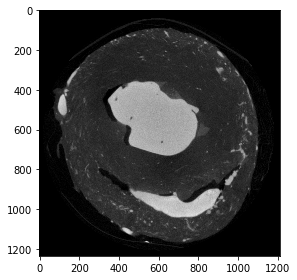

In [21]:
imshow(image)

In [ ]:
mask = imread('/mnt/md0/rajalakshmi/MultiLabel/trainning/ObjectSegmentation/labels/1683_raw_merged_red1027.tif')

In [ ]:
imshow(mask)

In [85]:
feature_stack = apoc.generate_feature_stack(image, "gaussian_blur=3")

In [88]:
feature_stack = apoc.generate_feature_stack(image, "")

In [79]:
def visualize(feature_stack):
    if len(feature_stack) == 0:
        return
    
    # show feature images
    import matplotlib.pyplot as plt
    width = 3
    height = int(len(feature_stack) / 3)
    if height * width < len(feature_stack):
        height = height + 1    
    
    fig, axes = plt.subplots(height, width, figsize=(10,10))

    # reshape(image.shape) is the opposite of ravel() here. We just need it for visualization.
    for i, f in enumerate(feature_stack):
        if height > 1:
            axes[int(i / 3)][i % 3].imshow(f, cmap=plt.cm.gray)
        else:
            axes[i].imshow(f, cmap=plt.cm.gray)

    w = len(feature_stack) % width
    if w > 0:
        w = width - w
        while (w > 0):
            if height > 1:
                axes[-1][width - w].set_visible(False)
            else:
                axes[width - w].set_visible(False)
            w = w - 1

            
    plt.show()
        

In [80]:
visualize(feature_stack)

In [ ]:
features = apoc.PredefinedFeatureSet.small_quick.value

In [ ]:
clf = apoc.ObjectSegmenter(opencl_filename='object_segmenter.cl', positive_class_identifier=2)
clf.train(features, mask, image)


In [ ]:
segmentation_result = clf.predict(image=image)

In [ ]:
cle.imshow(segmentation_result, labels=True)

In [ ]:
tifffile.imsave('/mnt/md0/rajalakshmi/MultiLabel/trainning/ObjectSegmentation/result.tif', segmentation_result)

In [14]:
result = imread('/mnt/md0/rajalakshmi/MultiLabel/trainning/ObjectSegmentation/result.tif')

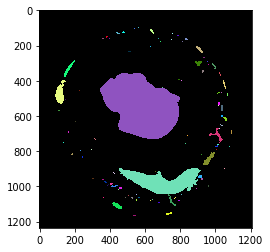

In [24]:
cle.imshow(result, labels=True)

In [22]:
regionprops_table(
    image,
    result,
    size=True,
    position=True,
)

,label,area,bbox_area,convex_area,equivalent_diameter,max_intensity,mean_intensity,min_intensity,centroid-0,centroid-1,bbox-0,bbox-1,bbox-2,bbox-3,weighted_centroid-0,weighted_centroid-1,standard_deviation_intensity
0,1,7,9,7,2.985411,102.0,96.571429,91.0,520.000000,87.000000,519,86,522,89,520.008876,87.004438,3.288818
1,2,4570,7888,5507,76.280435,216.0,168.308096,81.0,471.129103,120.121882,396,93,532,151,471.783111,119.253928,32.599762
2,3,60,88,66,8.740387,112.0,97.983333,88.0,566.266667,113.166667,560,110,571,118,566.327777,113.190849,6.533227
3,4,30,42,33,6.180387,115.0,99.400000,89.0,561.666667,137.933333,559,135,565,142,561.666667,137.922871,6.290734
4,5,24,30,26,5.527906,115.0,101.958333,92.0,750.500000,139.833333,748,138,754,143,750.497752,139.810380,6.919051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,157,31,40,33,6.282549,136.0,113.870968,91.0,897.354839,1052.258065,894,1050,902,1055,897.352975,1052.260057,14.125570
157,158,93,182,109,10.881695,116.0,100.333333,84.0,477.924731,1069.978495,465,1067,491,1074,477.815240,1069.967420,7.851215
158,159,18,28,21,4.787307,109.0,99.222222,88.0,771.888889,1081.777778,769,1080,776,1084,771.913774,1081.788354,5.759587
159,160,193,260,208,15.675944,173.0,126.455959,84.0,692.450777,1093.378238,679,1089,705,1099,692.556421,1093.478571,25.873534


In [25]:
import pyclesperanto_prototype as cle

cle.select_device("RTX")


<NVIDIA GeForce RTX 3090 on Platform: NVIDIA CUDA (1 refs)>

In [26]:
image = imread('/mnt/md0/rajalakshmi/MultiLabel/trainning/ObjectSegmentation/images/1683_raw_merged_red1027.tif')


In [27]:
image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

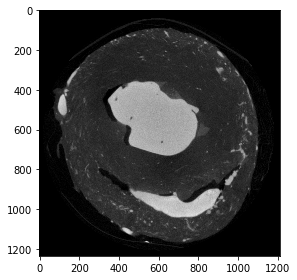

In [28]:
imshow(image)

In [29]:
blurred = cle.gaussian_blur(image, sigma_x=4, sigma_y=4)

Float image out of standard range; displaying image with stretched contrast.


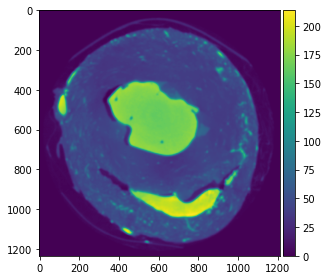

In [30]:
imshow(blurred)

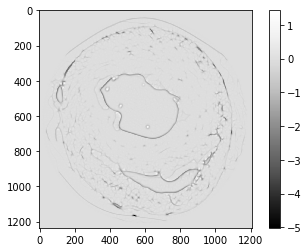

In [41]:
h1,h2,h3 = cle.hessian_eigenvalues(blurred)
cle.imshow(h1, colorbar=True)

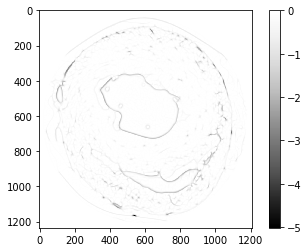

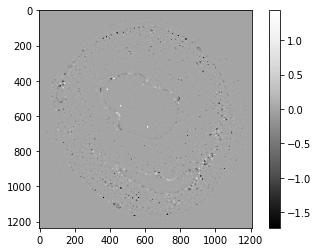

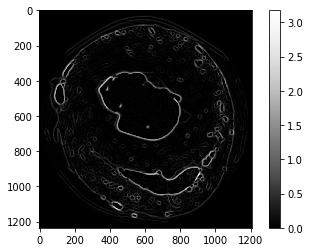

In [43]:
h1,h2,h3 = cle.hessian_eigenvalues([blurred, blurred, blurred])
cle.imshow(h1, colorbar=True)
cle.imshow(h2, colorbar=True)
cle.imshow(h3, colorbar=True)


In [89]:
blurr = cle.gaussian_blur(h3, sigma_x=4, sigma_y=4)

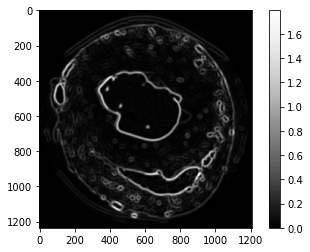

In [90]:
cle.imshow(blurr, colorbar=True)